In [1]:
from alf_utils import undistort, lane_edges, lane_poly, radius_of_curvature, fill_lane
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Camera calibration

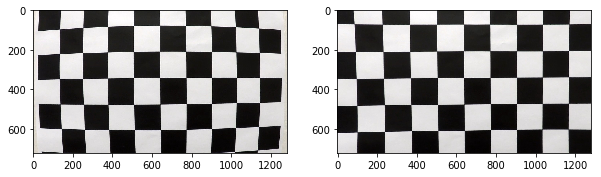

In [2]:
mtx, dist = undistort('camera_cal/')

img = cv2.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(dst[:,:,::-1])

# Perspective Transform

In [20]:
pts = np.array([[200,720],
                [616,433],
                [664,433],
                [1120,720]], dtype="float32")
dst = np.array([[200,720],
                [200,0],
                [1120,0],
                [1120,720]], dtype="float32")

M = cv2.getPerspectiveTransform(pts, dst)
Minv = cv2.getPerspectiveTransform(dst, pts)

In [21]:
img = cv2.imread('test_images/straight_lines2.jpg')
undist = cv2.undistort(img, mtx, dist, None, mtx)
warped = cv2.warpPerspective(undist, M, (1280, 720))

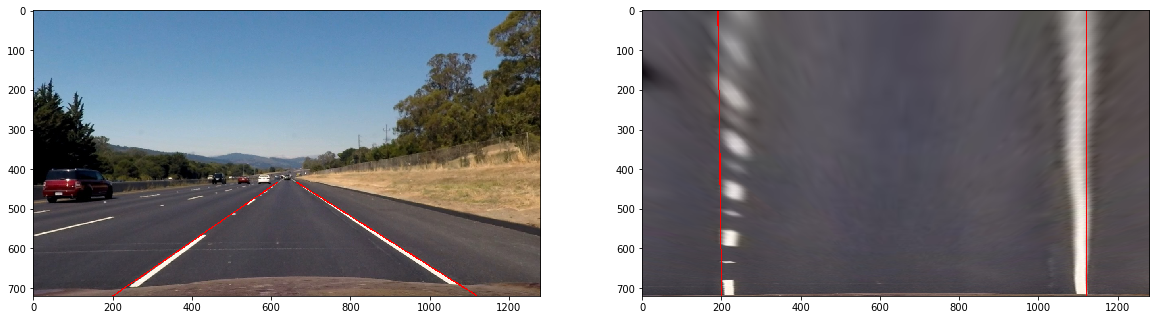

In [22]:
_ = cv2.line(undist,(200,720),(616,433),(0,0,255),2)
_ = cv2.line(undist,(664,433),(1120,720),(0,0,255),2)
_ = cv2.line(warped,(200,720),(191,0),(0,0,255),2)
_ = cv2.line(warped,(1120,0),(1120,720),(0,0,255),2)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(undist[:,:,::-1])
plt.subplot(122)
plt.imshow(warped[:,:,::-1])

# Lane Edges

In [23]:
img = cv2.imread('test_images/test3.jpg')
undist = cv2.undistort(img, mtx, dist, None, mtx)
binary = lane_edges(undist)
binary_warped = cv2.warpPerspective(binary, M, (1280, 720))

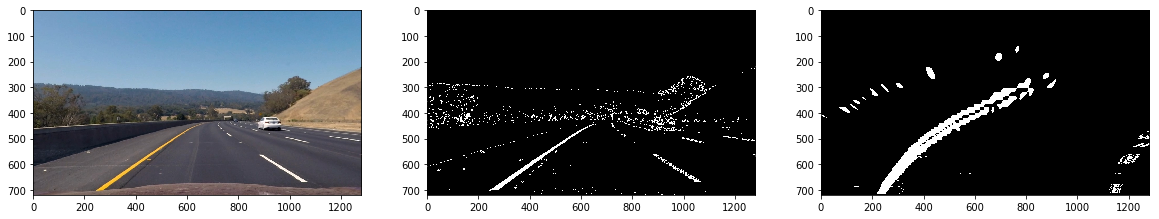

In [24]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(undist[:,:,::-1])
plt.subplot(132)
plt.imshow(binary, cmap='gray')
plt.subplot(133)
plt.imshow(binary_warped, cmap='gray')

# Polynomial Fit

In [25]:
left_fit, right_fit = lane_poly(binary_warped)

# Fill Lane

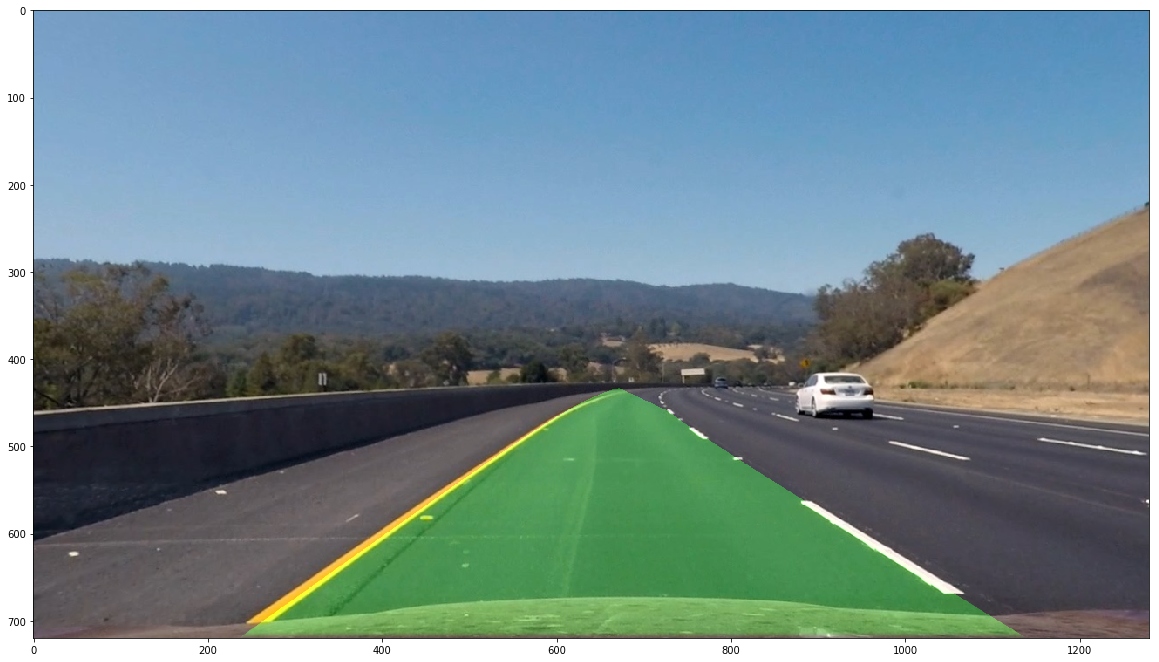

In [26]:
fill_img = fill_lane(undist, binary_warped, left_fit, right_fit, Minv)

plt.figure(figsize=(20,20))
plt.imshow(fill_img[:,:,::-1])

# Radius of Curvature

In [ ]:
left_curverad, right_curverad = radius_of_curvature(binary_warped, left_fit, right_fit)

print(left_curverad, 'm', right_curverad, 'm')

# Line Class

In [ ]:
from collections import deque

# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
#         # was the line detected in the last iteration?
#         self.detected = False  
#         # x values of the last n fits of the line
#         self.recent_xfitted = [] 
#         #average x values of the fitted line over the last n iterations
#         self.bestx = None     
#         #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
#         #distance in meters of vehicle center from the line
#         self.line_base_pos = None 
#         #difference in fit coefficients between last and new fits
#         self.diffs = np.array([0,0,0], dtype='float') 
#         #x values for detected line pixels
#         self.allx = None  
#         #y values for detected line pixels
#         self.ally = None
        
    def analyze_frame(self, img):
        undist = cv2.undistort(image[:,:,::-1], mtx, dist, None, mtx)
        binary = lane_edges(undist)
        binary_warped = cv2.warpPerspective(binary, M, (1280, 720))
        left_fit, right_fit = lane_poly(binary_warped)
        
        
        
        result = fill_lane(undist, binary_warped, left_fit, right_fit, Minv)
        
        

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
def process_image(image):
    undist = cv2.undistort(image[:,:,::-1], mtx, dist, None, mtx)
    binary = lane_edges(undist)
    binary_warped = cv2.warpPerspective(binary, M, (1280, 720))
    left_fit, right_fit = lane_poly(binary_warped)
    result = fill_lane(undist, binary_warped, left_fit, right_fit, Minv)

    return result[:,:,::-1]

In [ ]:
test_output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(0,5)
# clip1 = VideoFileClip("project_video.mp4")
# test_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
# %time test_clip.write_videofile(test_output, audio=False)
